In [3]:
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import scipy.stats as st
import math
from tqdm.notebook import tqdm
import iteration_utilities
import statsmodels
import scipy.optimize
import scipy.spatial.distance as sd
from lmfit import *
from matplotlib.lines import Line2D

mpl.rcParams['font.sans-serif'] = 'Arial'
mpl.rcParams['font.family'] = 'sans-serif'
plt.rcParams['figure.figsize'] = (5, 3)
mpl.rcParams['pdf.fonttype'] = 42
sns.set_style(
    'ticks',
    {
        'xtick.major.size': 4,
        'ytick.major.size': 4,
        'font_color': 'k',
        'axes.edgecolor': 'k',
        'xtick.color': 'k',
        'ytick.color': 'k',
    },
)
sns.set_context('talk', font_scale=1.0)

# Activator Validation Barplots

In [4]:
act_vals = pd.DataFrame.from_dict(
    {
        "concat": [
            "ANM2 + Ctrl",
#             "NOTC2 + Ctrl",
            "Ctrl + KIBRA",
            "ANM2 + KIBRA",
#             "NOTC2 + KIBRA",
#             "ANM2 + NOTC2",
        ],
        "frac_on": [1.2, 37.9, 93.0],
    }
)
act_vals.head()

,concat,frac_on
0,ANM2 + Ctrl,1.2
1,Ctrl + KIBRA,37.9
2,ANM2 + KIBRA,93.0


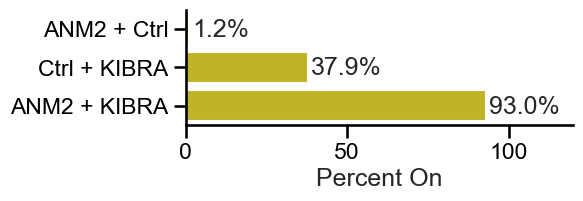

In [5]:
fig, ax = plt.subplots(figsize=(5, 1.5))
g = sns.barplot(
    data=act_vals,
    y="concat",
    x="frac_on",
    orient="h",
    color = "#DBC60D",
    ax=ax,
)
for i in range(len(list(act_vals["concat"]))):
    ax.text(
        x=list(act_vals["frac_on"])[i] + 1,
        y=i + 0.2,
        s="{:.1f}%".format(list(act_vals["frac_on"])[i]),
    )

ax.set_xlim(0, 120)
ax.set_xticks([0, 50, 100])
ax.set_xlabel("Percent On")
ax.set_ylabel("")

sns.despine(fig)

fig.savefig("./act_validation_bars.png", dpi=600, bbox_inches="tight")

In [6]:
act_antag_vals = pd.DataFrame.from_dict(
    {
        "concat": [
            "MYBA + Ctrl",
            "Ctrl + ZN473 KRAB",
            "MYBA + ZN473 KRAB",
        ],
        "frac_on": [88.8, 69.8, 32.8],
    }
)
act_antag_vals.head()

,concat,frac_on
0,MYBA + Ctrl,88.8
1,Ctrl + ZN473 KRAB,69.8
2,MYBA + ZN473 KRAB,32.8


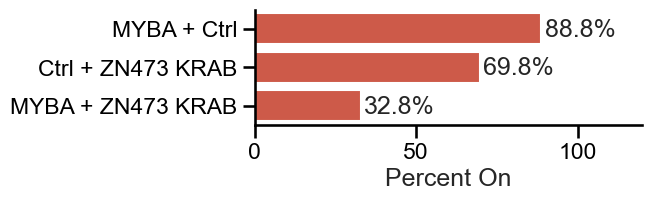

In [7]:
fig, ax = plt.subplots(figsize=(5, 1.5))
g = sns.barplot(
    data=act_antag_vals,
    y="concat",
    x="frac_on",
    orient="h",
    color = "#E34A33",
    ax=ax,
)
for i in range(len(list(act_antag_vals["concat"]))):
    ax.text(
        x=list(act_antag_vals["frac_on"])[i] + 1,
        y=i + 0.2,
        s="{:.1f}%".format(list(act_antag_vals["frac_on"])[i]),
    )

ax.set_xlim(0, 120)
ax.set_xticks([0, 50, 100])
ax.set_xlabel("Percent On")
ax.set_ylabel("")

sns.despine(fig)

fig.savefig("./act_antag_bars.png", dpi=600, bbox_inches="tight")

# StaPL bars

In [52]:
rep_df = pd.read_csv(
    "../../fig_3/02_repressor_validations/2022.04.18_repadd_stapl/data/plasmids_norm_cit_off.csv"
)
rep_df = rep_df[rep_df["plasmid"].isin([73, 217, 222])]
srdf = (
    rep_df[(rep_df["day"] == 5) & ((rep_df["plasmid"] == 73) | (rep_df["asv"] == 1))]
    .groupby(["plasmid", "description", "asv"])
    .mean()
    .reset_index()
)

descr_dict = {73: "StaPL TF", 217: "KRAB", 222: "FOXO3"}
srdf["description"] = [
    "StaPL TF, $-$ASV",
    "StaPL TF, $+$ASV",
    "KRAB", 
    "FOXO3"
]
srdf["order"] = srdf["plasmid"] - srdf["asv"]
srdf["norm Citrine Off"] = 100 * srdf["norm Citrine Off"]
srdf = srdf.sort_values(by="order", ascending=False)

srdf

,plasmid,description,asv,day,replicate,norm Citrine Off,order
3,222,FOXO3,1.0,5.0,1.5,41.470970,221.0
2,217,KRAB,1.0,5.0,1.5,98.594476,216.0
0,73,"StaPL TF, $-$ASV",0.0,5.0,1.5,38.542463,73.0
1,73,"StaPL TF, $+$ASV",1.0,5.0,1.5,99.105829,72.0


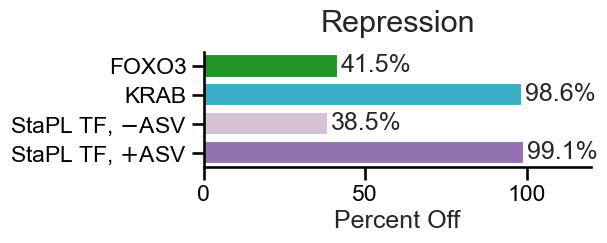

In [63]:
fig, ax = plt.subplots(figsize=(5, 1.5))

g = sns.barplot(
    data=srdf,
    x="norm Citrine Off",
    y="description",
    orient="h",
    palette = ["#0fa616", "#23bedb", "thistle", "tab:purple"],
    ax=ax
)

for i in range(len(list(srdf["plasmid"]))):
    ax.text(
        x=list(srdf["norm Citrine Off"])[i] + 1,
        y=i + 0.2,
        s="{:.1f}%".format(list(srdf["norm Citrine Off"])[i]),
    )

ax.set_xlim(0, 120)
ax.set_xticks([0, 50, 100])
ax.set_xlabel("Percent Off")
ax.set_ylabel("")
ax.set_title("Repression", fontsize=22, y=1.1)

sns.despine(fig)

fig.savefig("./stapl_repr_bars.png", bbox_inches="tight", dpi=600)

In [65]:
sadf = pd.DataFrame.from_dict(
    {
        "description": ["FOXO3", "KRAB", "StaPL TF, $-$ASV", "StaPL, $+$ASV"],
        "frac_on": [83.2, 0.0, 87.6, 0.0],
    }
)

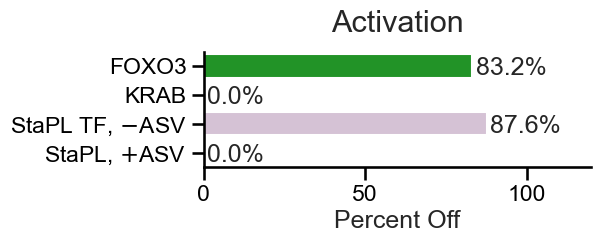

In [71]:
fig, ax = plt.subplots(figsize=(5, 1.5))

g = sns.barplot(
    data=sadf,
    x="frac_on",
    y="description",
    orient="h",
    palette = ["#0fa616", "#23bedb", "thistle", "tab:purple"],
    ax=ax
)

for i in range(len(list(sadf["description"]))):
    ax.text(
        x=list(sadf["frac_on"])[i] + 1,
        y=i + 0.3,
        s="{:.1f}%".format(list(sadf["frac_on"])[i]),
    )

ax.set_xlim(0, 120)
ax.set_xticks([0, 50, 100])
ax.set_xlabel("Percent Off")
ax.set_ylabel("")
ax.set_title("Activation", fontsize=22, y=1.1)

sns.despine(fig)

fig.savefig("./stapl_act_bars.png", bbox_inches="tight", dpi=600)

# Repression Validations

In [72]:
rep_df = pd.read_csv(
    "../../fig_3/02_repressor_validations/2022.04.18_repadd_stapl/data/plasmids_norm_cit_off.csv"
)
rep_df

,plasmid,description,day,asv,replicate,norm Citrine Off
0,56,STaPL-only,0.0,0.0,1.0,0.048413
1,56,STaPL-only,0.0,0.0,2.0,0.028066
2,56,STaPL-only,0.0,1.0,1.0,-0.003232
3,56,STaPL-only,0.0,1.0,2.0,0.008932
4,56,STaPL-only,1.0,0.0,1.0,0.001454
...,...,...,...,...,...,...
259,222,FOXO3-only,4.0,1.0,2.0,0.367725
260,222,FOXO3-only,5.0,0.0,1.0,0.447175
261,222,FOXO3-only,5.0,0.0,2.0,0.454140
262,222,FOXO3-only,5.0,1.0,1.0,0.404868


In [84]:
rdf = (
    rep_df[
        (rep_df["day"] == 5)
        & (rep_df["plasmid"].isin([181, 182, 77]))
        & (rep_df["asv"] == 0)
    ]
    .groupby(["plasmid", "description"])
    .mean()
    .reset_index()
    .sort_values(by="plasmid", ascending=False)
    .reset_index()
)
rdf["description"] = ["CBX1 + Ctrl", "ZNF10 + Ctrl", "ZNF10 + CBX1"]
rdf["norm Citrine Off"] = rdf["norm Citrine Off"] * 100
rdf

,index,plasmid,description,day,asv,replicate,norm Citrine Off
0,2,182,CBX1 + Ctrl,5.0,0.0,1.5,99.026223
1,1,181,ZNF10 + Ctrl,5.0,0.0,1.5,98.943850
2,0,77,ZNF10 + CBX1,5.0,0.0,1.5,99.071294


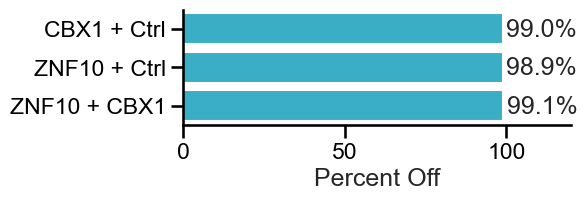

In [85]:
fig, ax = plt.subplots(figsize=(5, 1.5))
g = sns.barplot(
    data=rdf,
    y="description",
    x="norm Citrine Off",
    orient="h",
    color = "#23BEDB",
    ax=ax,
)
for i in range(len(list(rdf["plasmid"]))):
    ax.text(
        x=list(rdf["norm Citrine Off"])[i] + 1,
        y=i + 0.2,
        s="{:.1f}%".format(list(rdf["norm Citrine Off"])[i]),
    )

ax.set_xlim(0, 120)
ax.set_xticks([0, 50, 100])
ax.set_xlabel("Percent Off")
ax.set_ylabel("")

sns.despine(fig)

fig.savefig("./rep_sat_bars.png", dpi=600, bbox_inches="tight")